## DFO Nutrient Comparison

with chorlophyll, by cluster

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean

mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble =r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

%matplotlib inline

In [3]:
# PATH= '/results2/SalishSea/nowcast-green.201905/'
# modver='HC1905'
# start_date = dt.datetime(2013,1,1)
# end_date = dt.datetime(2017,1,1)
# flen=1
# namfmt='nowcast'
# #varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
# filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
# #gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
# fdict={'ptrc_T':1,'grid_T':1}
# rematch=True
# if rematch==True:
#     df1=et.loadDFO()
#     df1.head()

In [4]:
# if rematch==True:
#     data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)
#     pickle.dump(data,open(f'/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/TJCluster/pkls/dataDFO_{start_date}_{end_date}_{modver}.pkl','wb'))
# else:
#     data=pickle.load(open(f'/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/TJCluster/pkls/dataDFO_{start_date}_{end_date}_{modver}.pkl','rb'))

In [5]:
data = \
pd.read_csv('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFO_2013-01-01_2017-01-01_HC1905.csv')

###### reduce to 2015-2016 for clusters

In [6]:
data

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k
0,2013.0,4.0,4.0,14.705000,50.034667,-124.743833,2.1,NaN,NaN,NaN,...,196,0.068434,12.521634,0.331065,4.838788,0.287046,0.775307,25.883375,10.157967,2
1,2013.0,4.0,4.0,14.705000,50.034667,-124.743833,10.0,NaN,NaN,NaN,...,196,17.164568,42.073154,1.179255,6.481224,0.140845,0.342052,28.524574,8.088204,9
2,2013.0,4.0,4.0,14.705000,50.034667,-124.743833,19.5,NaN,NaN,NaN,...,196,24.194853,55.891056,1.496730,0.216739,0.106194,0.080276,28.773355,8.048738,18
3,2013.0,4.0,4.0,14.705000,50.034667,-124.743833,29.6,NaN,NaN,NaN,...,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,2013.0,4.0,4.0,14.705000,50.034667,-124.743833,45.0,NaN,NaN,NaN,...,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2016.0,11.0,4.0,20.174444,49.318333,-123.800000,175.1,NaN,NaN,NaN,...,246,26.845699,43.850685,0.840716,0.001186,0.014977,0.012721,31.283987,9.791328,29
5168,2016.0,11.0,4.0,20.174444,49.318333,-123.800000,200.0,NaN,NaN,NaN,...,246,26.860744,44.383499,0.810743,0.000622,0.010398,0.009636,31.378418,9.726195,30
5169,2016.0,11.0,4.0,20.174444,49.318333,-123.800000,249.9,NaN,NaN,NaN,...,246,27.050886,46.133629,0.779277,0.000507,0.008340,0.008646,31.554037,9.585861,32
5170,2016.0,11.0,4.0,20.174444,49.318333,-123.800000,299.8,NaN,NaN,NaN,...,246,27.217096,46.614559,0.815886,0.001072,0.014075,0.012172,31.648031,9.511919,34


In [9]:
display(list(data.columns.values))

data['Chlorophyll_Extracted_units']

['Year',
 'Month',
 'Day',
 'Hour',
 'Lat',
 'Lon',
 'Pressure',
 'Depth',
 'Ammonium',
 'Ammonium_units',
 'Chlorophyll_Extracted',
 'Chlorophyll_Extracted_units',
 'N',
 'Si',
 'Silicate_units',
 'AbsSal',
 'ConsT',
 'Z',
 'dtUTC',
 'j',
 'i',
 'mod_nitrate',
 'mod_silicon',
 'mod_ammonium',
 'mod_diatoms',
 'mod_ciliates',
 'mod_flagellates',
 'mod_vosaline',
 'mod_votemper',
 'k']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
5167    mg/m^3
5168    mg/m^3
5169    mg/m^3
5170    mg/m^3
5171    mg/m^3
Name: Chlorophyll_Extracted_units, Length: 5172, dtype: object

In [6]:
def rotmap(lon,lat,lon0,lat0,phi):
    # rotate around point (pick one near center of domain)
    # phi in degrees
    # first scale lats to match and center around lat0,lon0:
    lon1=(lon-lon0)*np.cos(lat0*np.pi/180)
    lat1=lat-lat0
    # now rotate:
    lon2=lon1*np.cos(phi*np.pi/180)-lat1*np.sin(phi*np.pi/180)
    lat2=lon1*np.sin(phi*np.pi/180)+lat1*np.cos(phi*np.pi/180)
    return lon2,lat2

In [7]:
cm1=cmocean.cm.thermal
#plt.get_cmap('PuBuGn')
#cm1=cmo.cm.matter
theta=-30
lon0=-123.9
lat0=49.3
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])
blon,blat=rotmap(bathylon,bathylat,lon0,lat0,theta)

In [8]:
mod_chl_N=1.6
#mod_chl_N=2.0
data['l10_obsChl']=np.log10(data['Chlorophyll_Extracted']+0.01)
data['l10_modChl']=np.log10(mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

##### Apply cluster information

In [9]:
cver = "BIO"
clusterD='/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/'
cfile = {2013:"BIO_clno_5_2013_reass.pkl",2014:"BIO_clno_5_2014_reass.pkl", 
         2015: "BIO_clno_5_2015_reass.pkl", 2016: "BIO_clno_5_2016_reass.pkl"}
cxf='Xcoords_for571_stations.pkl'
cyf='Ycoords_for571_stations.pkl'
print('Cluster version is:', cver)
# papermill reads dictionary keys as strings, so add code to correct this
cfile2=dict()
for key,val in cfile.items():
    cfile2[int(key)]=val
cfile=cfile2
cx=pickle.load(open(clusterD+cxf, 'rb'))
cy=pickle.load(open(clusterD+cyf, 'rb'))
cf=dict()
for iyear in cfile.keys():
    cf[iyear]=pickle.load(open(clusterD+cfile[iyear],'rb'))

def round2(num):
    return int(np.trunc((num+2)/10)*10+2)

data['Cluster']=np.zeros(len(data))
for ir, row in data.iterrows():
    ii=(cx==round2(row['i']))&(cy==round2(row['j']))
    if sum(ii)==1:
        cluster=cf[row['Year']][ii]
        data.at[ir,'Cluster']=int(cluster)
        
groups=pd.read_csv('/data/eolson/results/MEOPAR/clusterGroups/cluster_consolidated.csv')
cset0=set([(ii,jj) for ii,jj in groups.loc[:,['I','j']].values])
pdlist=list()
cset1=set()
for i,row in groups.iterrows():
    for ii in range(-5,5):
        for jj in range(-5,5):
            if not (row['I']+ii,row['j']+jj) in cset0|cset1:
                pdlist.append((row['I']+ii,row['j']+jj,row['Cluster_ID']))
                cset1.add((row['I']+ii,row['j']+jj))
newpd=pd.DataFrame(columns=['I', 'j', 'Cluster_ID'],data=pdlist)
data2=pd.merge(data,pd.concat((newpd,groups)),how='inner',left_on=['i','j'],right_on=['I','j'])

Cluster version is: BIO


In [10]:
for el in cf.keys():
    print(np.unique(cf[el]))

[1. 2. 3. 4. 5.]
[1. 2. 3. 4. 5.]
[1. 2. 3. 4. 5.]
[1. 2. 3. 4. 5.]


In [11]:
display(list(data.columns.values))

['Year',
 'Month',
 'Day',
 'Hour',
 'Lat',
 'Lon',
 'Pressure',
 'Depth',
 'Ammonium',
 'Ammonium_units',
 'Chlorophyll_Extracted',
 'Chlorophyll_Extracted_units',
 'N',
 'Si',
 'Silicate_units',
 'AbsSal',
 'ConsT',
 'Z',
 'dtUTC',
 'j',
 'i',
 'mod_nitrate',
 'mod_silicon',
 'mod_ammonium',
 'mod_diatoms',
 'mod_ciliates',
 'mod_flagellates',
 'mod_vosaline',
 'mod_votemper',
 'k',
 'l10_obsChl',
 'l10_modChl',
 'mod_Chl',
 'Cluster']

In [12]:
data['dtUTC'] = pd.to_datetime(data['dtUTC'], format="%Y-%m-%d %H:%M:%S")


In [13]:
np.unique(data['Cluster'])

array([0., 1., 2., 3., 4., 5.])

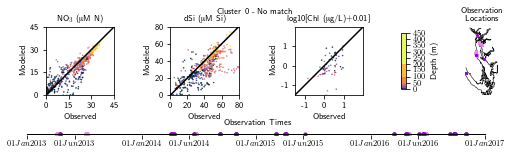

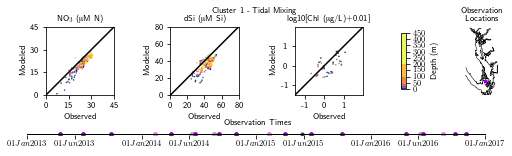

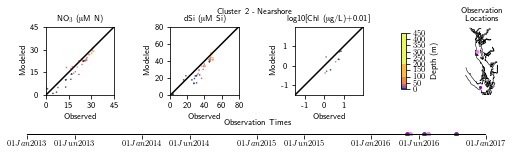

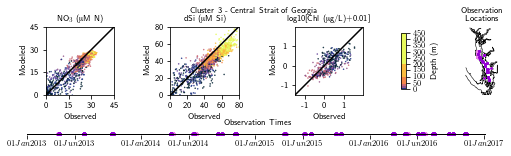

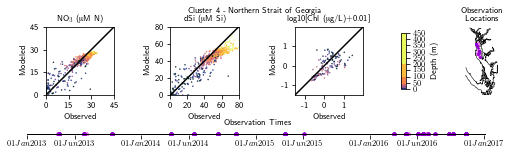

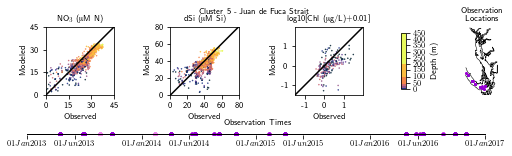

In [14]:
clnams = ['No match', 'Tidal Mixing', 'Nearshore',\
          'Central Strait of Georgia', 'Northern Strait of Georgia', 'Juan de Fuca Strait']
for ic in np.unique(data['Cluster']):
    clnam = clnams[int(ic)]
    bounds = np.array([0,5,10,15,20,40,100,200,450])
    norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    #pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')

    fig = plt.figure(figsize = (7.5,2.))
    gsv = gridspec.GridSpec(2,1,left=.08,right=.98,hspace=1,bottom=.1,top=.85,height_ratios=[4,.2])
    gs1=gridspec.GridSpecFromSubplotSpec(1,6,subplot_spec=gsv[0],wspace=.3,hspace=.34,
                                         width_ratios=[1,1,1,.05,.05,.6])
    axN = fig.add_subplot(gs1[0])
    axSi = fig.add_subplot(gs1[1])
    axChl = fig.add_subplot(gs1[2])
    axLmap = fig.add_subplot(gs1[-1])

    gscb = gridspec.GridSpecFromSubplotSpec(11,1,subplot_spec=gs1[3])
    axcb = fig.add_subplot(gscb[1:-1])

    axL=fig.add_subplot(gsv[1])

    axN.plot((0,45),(0,45),'k-')
    axSi.plot((0,80),(0,80),'k-')
    axChl.plot((-2,2),(-2,2),'k-')

    vm0=-150
    args={'marker':'.','s':1,'norm':norm}
    data2015=data.loc[(data.Cluster==ic)]
    ps=et.varvarScatter(axN,data2015,'N','mod_nitrate','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
    ps=et.varvarScatter(axSi,data2015,'Si','mod_silicon','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
    ps=et.varvarScatter(axChl,data2015,'l10_obsChl','l10_modChl','Z',vmin=vm0,vmax=450,cm=cm1,args=args)

    cb=fig.colorbar(ps,cax=axcb,boundaries=np.linspace(0,450,46))
    cb.set_label('Depth (m)')
    #cb.set_ylim(0,450)

    ntick=np.arange(0,56,15)
    ntickl=[str(i) for i in ntick]
    for ax in (axN,):
        ax.set_xlim((0,45))
        ax.set_ylim((0,45))
        ax.set_xticks(ntick)
        ax.set_xticklabels(ntickl)
        ax.set_yticks(ntick)
        ax.set_yticklabels(ntickl)

    stick=np.arange(0,81,20)
    stickl=[str(i) for i in stick]
    for ax in (axSi,):
        ax.set_xlim((0,80))
        ax.set_ylim((0,80))
        ax.set_xticks(stick)
        ax.set_xticklabels(stickl)
        ax.set_yticks(stick)
        ax.set_yticklabels(stickl)

    ctick=np.arange(-1,2,1)
    ctickl=[str(i) for i in ctick]
    for ax in (axChl,):
        ax.set_xlim((-1.5,2))
        ax.set_ylim((-1.5,2))
        ax.set_xticks(ctick)
        ax.set_xticklabels(ctickl)
        ax.set_yticks(ctick)
        ax.set_yticklabels(ctickl)

    for ax in (axN,axSi,axChl,):
        ax.set_aspect(1, adjustable='box')
        #ax.set_xlabel('Observed')

    axN.set_ylabel('Modeled')
    axSi.set_ylabel('Modeled')
    axChl.set_ylabel('Modeled')
    axN.set_xlabel('Observed')
    axSi.set_xlabel('Observed')
    axChl.set_xlabel('Observed')


    axN.set_title('NO$_3$ ($\muup$M N)')
    axSi.set_title('dSi ($\muup$M Si)')
    axChl.set_title('log10[Chl ($\muup$g/L)+0.01]')

    #viz_tools.set_aspect(axLmap)
    for axLi in (axLmap,):
        axLi.set_aspect(1, adjustable='box')
        contour_lines = axLi.contour(blon,blat,bathyZ,[1e-5],
                    colors='black',zorder=2,linewidths=.5)
        axLi.set_xlim(-1.02,0.81)
        axLi.set_ylim(-1.5,1.8)
        axLi.axis('off')
    datanut2015=data2015.loc[(data2015.N>=0)|(data2015.Si>=0)]
    dataChl2015=data2015.loc[(data2015.Chlorophyll_Extracted>=0)]

    lons15,lats15=rotmap(datanut2015['Lon'], datanut2015['Lat'],lon0,lat0,theta)
    lons15chl,lats15chl=rotmap(dataChl2015['Lon'], dataChl2015['Lat'],lon0,lat0,theta)
    axLmap.plot(lons15,lats15, '.',color='violet',markersize=2)
    axLmap.plot(lons15chl,lats15chl, '.',color='darkviolet',markersize=2)
    axLmap.set_title('Observation\nLocations',fontsize=8)

    axL.set_title('Observation Times',fontsize=8)
    p1a,=axL.plot(datanut2015.dtUTC,np.zeros(np.shape(datanut2015.dtUTC)),'.',color='violet',markersize=6,label='2015')
    p1,=axL.plot(dataChl2015.dtUTC,np.zeros(np.shape(dataChl2015.dtUTC)),'.',color='darkviolet',markersize=6,label='2015')
    axL.set_yticks(());
    yearsFmt = mdates.DateFormatter('%d %b %Y')
    axL.xaxis.set_major_formatter(yearsFmt)

    axL.xaxis.set_ticks([dt.datetime(2013,1,1), dt.datetime(2013,6,1),
                         dt.datetime(2014,1,1), dt.datetime(2014,6,1),
                         dt.datetime(2015,1,1), dt.datetime(2015,6,1),
                         dt.datetime(2016,1,1), dt.datetime(2016,6,1),
                         dt.datetime(2017,1,1)])
    labels=axL.xaxis.get_ticklabels()
    for tick in axL.get_xticklabels():
            #tick.set_rotation(90)
            tick.set_horizontalalignment('center')
    axL.set_ylim(-.1,.3)
    axLpos=axL.get_position()
    new = mpl.transforms.Bbox.from_bounds(axLpos.bounds[0],axLpos.bounds[1],axLpos.bounds[2]-.05,axLpos.bounds[3])
    axL.set_position(new)
    #axL.legend(handles=[p1,p2,p3],loc=8,ncol=3,bbox_to_anchor=[.5,-4])
    axL.set_frame_on(False)
    #axL.axes.get_yaxis().set_visible(False)
    #axL.axes.get_xaxis().set_visible(True)
    xmin, xmax = axL.get_xaxis().get_view_interval()
    ymin, ymax = axL.get_yaxis().get_view_interval()
    axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
    fig.suptitle(f'Cluster {str(int(ic))} - {clnam}')
    fnam = f'./figs/BIO_eval_CL_{int(ic)}_2013_20177_HC1905.png'
    fig.savefig(fnam,dpi=200,transparent=True)

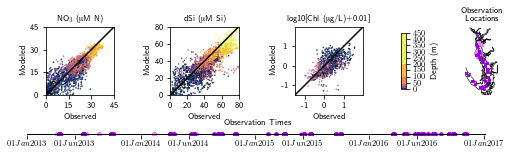

In [15]:

bounds = np.array([0,5,10,15,20,40,100,200,450])
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
#pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')

fig = plt.figure(figsize = (7.5,2.))
gsv = gridspec.GridSpec(2,1,left=.08,right=.98,hspace=1,bottom=.1,top=.85,height_ratios=[4,.2])
gs1=gridspec.GridSpecFromSubplotSpec(1,6,subplot_spec=gsv[0],wspace=.3,hspace=.34,
                                     width_ratios=[1,1,1,.05,.05,.6])
axN = fig.add_subplot(gs1[0])
axSi = fig.add_subplot(gs1[1])
axChl = fig.add_subplot(gs1[2])
axLmap = fig.add_subplot(gs1[-1])

gscb = gridspec.GridSpecFromSubplotSpec(11,1,subplot_spec=gs1[3])
axcb = fig.add_subplot(gscb[1:-1])

axL=fig.add_subplot(gsv[1])

axN.plot((0,45),(0,45),'k-')
axSi.plot((0,80),(0,80),'k-')
axChl.plot((-2,2),(-2,2),'k-')

vm0=-150
args={'marker':'.','s':1,'norm':norm}
data2015=data
ps=et.varvarScatter(axN,data2015,'N','mod_nitrate','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
ps=et.varvarScatter(axSi,data2015,'Si','mod_silicon','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
ps=et.varvarScatter(axChl,data2015,'l10_obsChl','l10_modChl','Z',vmin=vm0,vmax=450,cm=cm1,args=args)

cb=fig.colorbar(ps,cax=axcb,boundaries=np.linspace(0,450,46))
cb.set_label('Depth (m)')
#cb.set_ylim(0,450)

ntick=np.arange(0,56,15)
ntickl=[str(i) for i in ntick]
for ax in (axN,):
    ax.set_xlim((0,45))
    ax.set_ylim((0,45))
    ax.set_xticks(ntick)
    ax.set_xticklabels(ntickl)
    ax.set_yticks(ntick)
    ax.set_yticklabels(ntickl)

stick=np.arange(0,81,20)
stickl=[str(i) for i in stick]
for ax in (axSi,):
    ax.set_xlim((0,80))
    ax.set_ylim((0,80))
    ax.set_xticks(stick)
    ax.set_xticklabels(stickl)
    ax.set_yticks(stick)
    ax.set_yticklabels(stickl)

ctick=np.arange(-1,2,1)
ctickl=[str(i) for i in ctick]
for ax in (axChl,):
    ax.set_xlim((-1.5,2))
    ax.set_ylim((-1.5,2))
    ax.set_xticks(ctick)
    ax.set_xticklabels(ctickl)
    ax.set_yticks(ctick)
    ax.set_yticklabels(ctickl)

for ax in (axN,axSi,axChl,):
    ax.set_aspect(1, adjustable='box')
    #ax.set_xlabel('Observed')

axN.set_ylabel('Modeled')
axSi.set_ylabel('Modeled')
axChl.set_ylabel('Modeled')
axN.set_xlabel('Observed')
axSi.set_xlabel('Observed')
axChl.set_xlabel('Observed')


axN.set_title('NO$_3$ ($\muup$M N)')
axSi.set_title('dSi ($\muup$M Si)')
axChl.set_title('log10[Chl ($\muup$g/L)+0.01]')

#viz_tools.set_aspect(axLmap)
for axLi in (axLmap,):
    axLi.set_aspect(1, adjustable='box')
    contour_lines = axLi.contour(blon,blat,bathyZ,[1e-5],
                colors='black',zorder=2,linewidths=.5)
    axLi.set_xlim(-1.02,0.81)
    axLi.set_ylim(-1.5,1.8)
    axLi.axis('off')
datanut2015=data2015.loc[(data2015.N>=0)|(data2015.Si>=0)]
dataChl2015=data2015.loc[(data2015.Chlorophyll_Extracted>=0)]

lons15,lats15=rotmap(datanut2015['Lon'], datanut2015['Lat'],lon0,lat0,theta)
lons15chl,lats15chl=rotmap(dataChl2015['Lon'], dataChl2015['Lat'],lon0,lat0,theta)
axLmap.plot(lons15,lats15, '.',color='violet',markersize=2)
axLmap.plot(lons15chl,lats15chl, '.',color='darkviolet',markersize=2)
axLmap.set_title('Observation\nLocations',fontsize=8)

axL.set_title('Observation Times',fontsize=8)
p1a,=axL.plot(datanut2015.dtUTC,np.zeros(np.shape(datanut2015.dtUTC)),'.',color='violet',markersize=6,label='2015')
p1,=axL.plot(dataChl2015.dtUTC,np.zeros(np.shape(dataChl2015.dtUTC)),'.',color='darkviolet',markersize=6,label='2015')
axL.set_yticks(());
yearsFmt = mdates.DateFormatter('%d %b %Y')
axL.xaxis.set_major_formatter(yearsFmt)

axL.xaxis.set_ticks([dt.datetime(2013,1,1), dt.datetime(2013,6,1),
                     dt.datetime(2014,1,1), dt.datetime(2014,6,1),
                     dt.datetime(2015,1,1), dt.datetime(2015,6,1),
                     dt.datetime(2016,1,1), dt.datetime(2016,6,1),
                     dt.datetime(2017,1,1)])
labels=axL.xaxis.get_ticklabels()
for tick in axL.get_xticklabels():
        #tick.set_rotation(90)
        tick.set_horizontalalignment('center')
axL.set_ylim(-.1,.3)
axLpos=axL.get_position()
new = mpl.transforms.Bbox.from_bounds(axLpos.bounds[0],axLpos.bounds[1],axLpos.bounds[2]-.05,axLpos.bounds[3])
axL.set_position(new)
#axL.legend(handles=[p1,p2,p3],loc=8,ncol=3,bbox_to_anchor=[.5,-4])
axL.set_frame_on(False)
#axL.axes.get_yaxis().set_visible(False)
#axL.axes.get_xaxis().set_visible(True)
xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
#fig.suptitle('Cluster '+str(ic))
#fig.savefig(f'/data/eolson/results/MEOPAR/figs/eval/dfoEval{modver}_Cluster{int(ic)}.png',dpi=200,transparent=True)

<ipython-input-16-2857bd7db9eb>:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


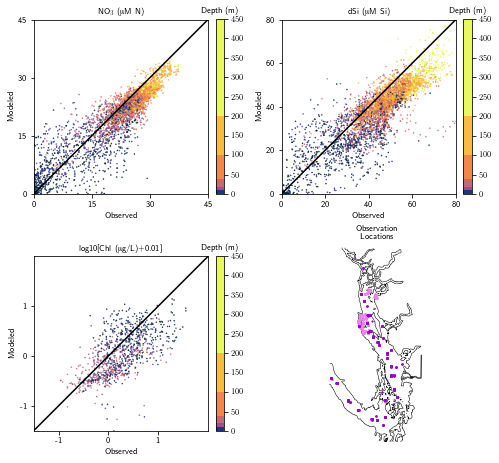

In [16]:
fig = plt.figure(figsize = (7,6.7))
gsv = gridspec.GridSpec(2,2,left=.08,right=.95,bottom=.05,top=.95,
                        hspace=.2,wspace=.3)
#gs1=gridspec.GridSpecFromSubplotSpec(3,5,subplot_spec=gsv[0],wspace=.3,hspace=.34,
#                                     height_ratios=[1,1,1],width_ratios=[1,1,1,.1,.1])
axN=fig.add_subplot(gsv[0,0])
axSi = fig.add_subplot(gsv[0,1])
axChl = fig.add_subplot(gsv[1,0])
axLmap= fig.add_subplot(gsv[1,1])

# axN.plot((0,45),(0,45),'k-')
# axSi.plot((0,80),(0,80),'k-')
# axChl.plot((-2,2),(-2,2),'k-')

vm0=-150
args={'marker':'.','s':1,'norm':norm}
data2015=data
ps1=et.varvarScatter(axN,data2015,'N','mod_nitrate','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
ps2=et.varvarScatter(axSi,data2015,'Si','mod_silicon','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
ps3=et.varvarScatter(axChl,data2015,'l10_obsChl','l10_modChl','Z',vmin=vm0,vmax=450,cm=cm1,args=args)

cbN=fig.colorbar(ps1,ax=axN,fraction=0.046, pad=0.04, boundaries=np.linspace(0,450,46))
cbSi=fig.colorbar(ps2,ax=axSi,fraction=0.046, pad=0.04, boundaries=np.linspace(0,450,46))
cbChl=fig.colorbar(ps3,ax=axChl,fraction=0.046, pad=0.04, boundaries=np.linspace(0,450,46))
for iax in (cbN,cbSi,cbChl):
    iax.ax.set_title('Depth (m)')
    
#cb=fig.colorbar(ps,cax=axcb,boundaries=np.linspace(0,450,46))
#cb.set_label('Depth (m)')
    
#viz_tools.set_aspect(axLmap)
for axLi in (axLmap,):
    axLi.set_aspect(1, adjustable='box')
    contour_lines = axLi.contour(blon,blat,bathyZ,[1e-5],
                colors='black',zorder=2,linewidths=.5)
    axLi.set_xlim(-1.02,0.81)
    axLi.set_ylim(-1.5,1.8)
    axLi.axis('off')
datanut2015=data2015.loc[(data2015.N>=0)|(data2015.Si>=0)]
dataChl2015=data2015.loc[(data2015.Chlorophyll_Extracted>=0)]

lons15,lats15=rotmap(datanut2015['Lon'], datanut2015['Lat'],lon0,lat0,theta)
lons15chl,lats15chl=rotmap(dataChl2015['Lon'], dataChl2015['Lat'],lon0,lat0,theta)
axLmap.plot(lons15,lats15, '.',color='violet',markersize=2)
axLmap.plot(lons15chl,lats15chl, '.',color='darkviolet',markersize=2)
axLmap.set_title('Observation\nLocations',fontsize=8)


for ax in (axN,):
    ax.set_xlim((0,45))
    ax.set_ylim((0,45))
    ax.set_xticks(ntick)
    ax.set_xticklabels(ntickl)
    ax.set_yticks(ntick)
    ax.set_yticklabels(ntickl)

stick=np.arange(0,81,20)
stickl=[str(i) for i in stick]
for ax in (axSi,):
    ax.set_xlim((0,80))
    ax.set_ylim((0,80))
    ax.set_xticks(stick)
    ax.set_xticklabels(stickl)
    ax.set_yticks(stick)
    ax.set_yticklabels(stickl)

ctick=np.arange(-1,2,1)
ctickl=[str(i) for i in ctick]
for ax in (axChl,):
    ax.set_xlim((-1.5,2))
    ax.set_ylim((-1.5,2))
    ax.set_xticks(ctick)
    ax.set_xticklabels(ctickl)
    ax.set_yticks(ctick)
    ax.set_yticklabels(ctickl)

for ax in (axN,axSi,axChl,):
    ax.set_aspect(1, adjustable='box')
    #ax.set_xlabel('Observed')

axN.set_ylabel('Modeled')
axSi.set_ylabel('Modeled')
axChl.set_ylabel('Modeled')
axN.set_xlabel('Observed')
axSi.set_xlabel('Observed')
axChl.set_xlabel('Observed')

axN.plot((0,45),(0,45),'k-')
axSi.plot((0,80),(0,80),'k-')
axChl.plot((-2,2),(-2,2),'k-')

axN.set_title('NO$_3$ ($\muup$M N)')
axSi.set_title('dSi ($\muup$M Si)')
axChl.set_title('log10[Chl ($\muup$g/L)+0.01]')

plt.tight_layout()

fnam = f'./figs/BIO_eval_2013_20177_HC1905.png'
fig.savefig(fnam,dpi=200,transparent=True)


In [17]:
# fig = plt.figure(figsize = (7,6.3))
# gsv = gridspec.GridSpec(2,2,left=.08,right=.95,bottom=.05,top=.95,
#                         hspace=.2,wspace=.3)
# #gs1=gridspec.GridSpecFromSubplotSpec(3,5,subplot_spec=gsv[0],wspace=.3,hspace=.34,
# #                                     height_ratios=[1,1,1],width_ratios=[1,1,1,.1,.1])
# axT=fig.add_subplot(gsv[0,0])
# axS = fig.add_subplot(gsv[0,1])
# axN = fig.add_subplot(gsv[1,0])
# axM= fig.add_subplot(gsv[1,1])

# iiT=(~np.isnan(data['ConsT']))&(~np.isnan(data['mod_votemper']))
# iiS=(~np.isnan(data['AbsSal']))&(~np.isnan(data['mod_vosaline']))
# iiN=(~np.isnan(data['N']))&(~np.isnan(data['mod_nitrate']))
# counts, xedges, yedges, m1=axT.hist2d(data.loc[iiT,['ConsT']].values.flatten(),
#                                       data.loc[iiT,['mod_votemper']].values.flatten(),bins=25*3,norm=LogNorm())
# counts, xedges, yedges, m2=axS.hist2d(data.loc[iiS,['AbsSal']].values.flatten(),
#                                       data.loc[iiS,['mod_vosaline']].values.flatten(),bins=36*3,norm=LogNorm())
# counts, xedges, yedges, m3=axN.hist2d(data.loc[iiN,['N']].values.flatten(),
#                                       data.loc[iiN,['mod_nitrate']].values.flatten(),bins=36*3,norm=LogNorm())
# for iax in (axT,axS,axN):
#     iax.set_aspect(1)
#     iax.set_ylabel('Modelled')
#     iax.set_xlabel('Observed')
# axT.set_title('$\Theta$ ($^{\circ}$C)')
# Tlims=[5,22]
# axT.set_xlim(Tlims)
# axT.set_ylim(Tlims)
# axT.plot(Tlims,Tlims,'k-',lw=1)
# axS.set_title('S$_A$ (g kg$^{-1}$)')
# Slims=[4,35]
# axS.set_xlim(Slims)
# axS.set_ylim(Slims)
# axS.plot(Slims,Slims,'k-',lw=1)
# axN.set_title('NO$_3$ ($\muup$M N)')
# Nlims=[0,36]
# axN.set_xlim(Nlims)
# axN.set_ylim(Nlims)
# axN.plot(Nlims,Nlims,'k-',lw=1)
# # cbT=fig.colorbar(m1,ax=axT,fraction=0.046, pad=0.04)
# # cbS=fig.colorbar(m2,ax=axS,fraction=0.046, pad=0.04)
# # cbN=fig.colorbar(m3,ax=axN,fraction=0.046, pad=0.04)
# # for iax in (cbT,cbS,cbN):
# #     iax.ax.set_title('Count')
    
# axM.set_aspect(1, adjustable='box')
# contour_lines = axM.contour(blon,blat,bathyZ,[1e-5],
#             colors='gray',linewidths=1,zorder=2,)
# axM.set_xlim(-1.02,0.81)
# axM.set_ylim(-1.5,1.8)
# axM.axis('off')

# lonsT,latsT=rotmap(data.loc[iiT,['Lon']].values.flatten(), data.loc[iiT,['Lat']].values.flatten(),lon0,lat0,theta)
# axM.plot(lonsT,latsT,
#          '.',color='navy',markersize=2)
# axM.annotate('Observation Locations',xy=[.5,1.01],xycoords='axes fraction',ha='center',fontsize=8)
# fig.savefig('eval_2013_2017_HC1905.png',dpi=300)

In [18]:
print('All Chl:')
print('all:')
print('0= no cluster')
et.printstats(data,'l10_obsChl','l10_modChl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl),:],'Chlorophyll_Extracted','mod_Chl')
    
ID = ['fulldomain','CSoG','NSoG','JdF']
bias = [-1.406956582727288,-1.5367594973959813,-1.1685371322672171,-1.4477518526441968]
RMSE = [4.040976848405702,]

All Chl:
all:
0= no cluster
  N: 950
  bias: -0.22603417755407665
  RMSE: 0.4803561858136704
  WSS: 0.7123418386142875
cluster 0
  N: 68
  bias: -0.8796319187970423
  RMSE: 2.4519490200103164
  WSS: 0.672767046620611
cluster 1
  N: 43
  bias: -1.3311679140634314
  RMSE: 2.478330397257175
  WSS: 0.6414901936821265
cluster 2
  N: 9
  bias: -1.419605740706125
  RMSE: 2.045555100981164
  WSS: 0.7801800275880982
cluster 3
  N: 475
  bias: -1.5367594973959813
  RMSE: 4.347413244226778
  WSS: 0.5555036607568502
cluster 4
  N: 133
  bias: -1.1685371322672171
  RMSE: 3.9802719035128034
  WSS: 0.3965768935692161
cluster 5
  N: 222
  bias: -1.4477518526441968
  RMSE: 4.092328384296318
  WSS: 0.47492225269477073


In [19]:
print('Surface Chl:')
print('all:')
print('0= no cluster')
et.printstats(data.loc[data.Z<10,:],'Chlorophyll_Extracted','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z<10),:],'Chlorophyll_Extracted','mod_Chl')

Surface Chl:
all:
0= no cluster
  N: 448
  bias: -1.7650823420837183
  RMSE: 5.1597652855800655
  WSS: 0.5031295473816424
cluster 0
  N: 32
  bias: -0.586355029858165
  RMSE: 2.821482903553643
  WSS: 0.6879700127681709
cluster 1
  N: 19
  bias: -1.0634836295639212
  RMSE: 2.344900856079811
  WSS: 0.7287748326331751
cluster 2
  N: 4
  bias: -1.753255829811096
  RMSE: 1.9810617351324484
  WSS: 0.78811945777726
cluster 3
  N: 225
  bias: -2.1229084444257955
  RMSE: 5.476600783013703
  WSS: 0.5315270124503486
cluster 4
  N: 65
  bias: -1.4795047339980423
  RMSE: 5.198989128309432
  WSS: 0.3431800478096362
cluster 5
  N: 103
  bias: -1.6597292069068867
  RMSE: 5.43888484418991
  WSS: 0.4444729712589637


In [20]:
print('All NO3:')
print('all:')
print('0= no cluster')
et.printstats(data,'N','mod_nitrate')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl),:],'N','mod_nitrate')

All NO3:
all:
0= no cluster
  N: 4732
  bias: -1.9456225389420467
  RMSE: 3.936833733282388
  WSS: 0.9397569973786136
cluster 0
  N: 582
  bias: -1.3142056220936276
  RMSE: 4.7365925039708365
  WSS: 0.9327052139591868
cluster 1
  N: 277
  bias: -2.8496943384301368
  RMSE: 3.384033345991773
  WSS: 0.8589571236788445
cluster 2
  N: 46
  bias: -1.7618750366957272
  RMSE: 3.3699581901174285
  WSS: 0.9648674452406951
cluster 3
  N: 2212
  bias: -2.126327268558331
  RMSE: 3.7144026445771674
  WSS: 0.9463849244079883
cluster 4
  N: 682
  bias: -0.9380498328282769
  RMSE: 3.6677379409719832
  WSS: 0.9520931498009404
cluster 5
  N: 933
  bias: -2.3882322558866065
  RMSE: 4.255357380997354
  WSS: 0.8965593941519092


In [21]:
print('All dSi:')
print('all:')
print('0= no cluster')
et.printstats(data,'Si','mod_silicon')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl),:],'Si','mod_silicon')

All dSi:
all:
0= no cluster
  N: 4732
  bias: -6.1796957063371
  RMSE: 9.719739343904
  WSS: 0.8654243374547623
cluster 0
  N: 582
  bias: -6.876848311039183
  RMSE: 12.812597475743928
  WSS: 0.8194137508933672
cluster 1
  N: 277
  bias: -5.73315767267551
  RMSE: 7.3468557190259505
  WSS: 0.7206564429445312
cluster 2
  N: 46
  bias: -5.4708041165963515
  RMSE: 6.9805529131724
  WSS: 0.9236827670837162
cluster 3
  N: 2212
  bias: -6.991785534125825
  RMSE: 9.719630793030536
  WSS: 0.8663135545497569
cluster 4
  N: 682
  bias: -5.85630375356935
  RMSE: 9.133200220426348
  WSS: 0.913185806570674
cluster 5
  N: 933
  bias: -4.223391146031226
  RMSE: 8.565528903673297
  WSS: 0.7862887757483079
